In [1]:
import os
import sys

sys.path.append(os.path.join("..",".."))
sys.path.append(os.path.join("..","..","..",'Data_prep'))
#sys.path.append(os.path.join(".."))

import numpy as np

import pickle
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from Utils import *

In [21]:
!ls ../GMVAE_A1_2

best0.pt  checkpoint.pt   desc.txt		 loss_results.npy
best1.pt  data_split.pkl  fold_loss_results.npy


In [2]:
#import Utils_imp_VAE
#from B_VAE.VAE_v2 import b_encodeco
from B_VAE.VAE_v2 import GMVAE

In [3]:
res_dir=os.path.join("..",'GMVAE_A1_2')

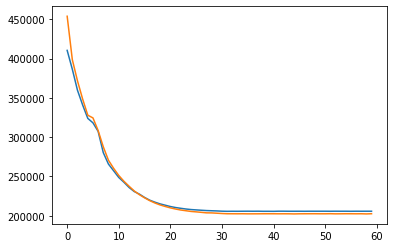

In [4]:
train,test=read_results(np.load(os.path.join(res_dir,'bce_results.npy'),allow_pickle=True),0)
train1,test1=read_results(np.load(os.path.join(res_dir,'bce_results.npy'),allow_pickle=True),1)

plt.plot(test+test1)
plt.plot(train+train1)

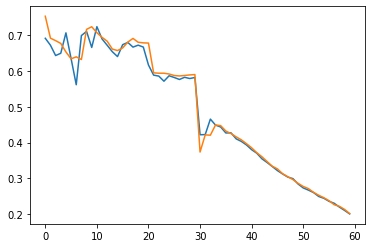

In [5]:
train,test=read_results(np.load(os.path.join(res_dir,'kld_results.npy'),allow_pickle=True),0)
train1,test1=read_results(np.load(os.path.join(res_dir,'kld_results.npy'),allow_pickle=True),1)

plt.plot(test+test1)
plt.plot(train+train1)

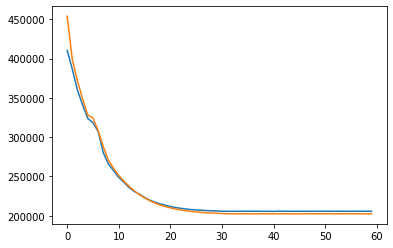

In [6]:
train,test=read_results(np.load(os.path.join(res_dir,'loss_results.npy'),allow_pickle=True),0)
train1,test1=read_results(np.load(os.path.join(res_dir,'loss_results.npy'),allow_pickle=True),1)

plt.plot(test+test1)
plt.plot(train+train1)

In [4]:
#a=torch.load('best1.pt')
a=torch.load(os.path.join(res_dir,'best0.pt'))

In [5]:
from torch import nn
model=GMVAE(image_dim=int(100),
        image_channels=3,
        repr_sizes=[6,12,24],
        layer_sizes=[10],
        w_latent_space_size=5,
        z_latent_space_size=5,
        y_latent_space_size=12,
        conv_kernel_size=7,
        conv_pooling=False,
        activators=[nn.Tanh(),nn.LeakyReLU(),nn.LeakyReLU()],
        conv_batch_norm=True,
        NN_batch_norm=True,
        stride=2,
        device="cpu")

In [6]:
model.load_state_dict(a)

<All keys matched successfully>

In [7]:
model.eval()

GMVAE(
  (encoder_conv): b_encoder_conv(
    (im_layers): ModuleList(
      (0): set_conv(
        (comp_layer): ModuleList(
          (0): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
          (1): Tanh()
          (2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): set_conv(
        (comp_layer): ModuleList(
          (0): Conv2d(6, 12, kernel_size=(7, 7), stride=(1, 1))
          (1): LeakyReLU(negative_slope=0.01)
          (2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): set_conv(
        (comp_layer): ModuleList(
          (0): Conv2d(12, 24, kernel_size=(7, 7), stride=(1, 1))
          (1): LeakyReLU(negative_slope=0.01)
          (2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
  )
  (P): P_NET(
    (pz_wy_mu): ModuleList(
      (0): NeuralNet(
        (layers): ModuleList(
          (0): Se

In [8]:
from torchvision import transforms
from Custom_dataloader import *
from Transforms import phantom_segmentation
from Transforms import phantom_segmentation_
from Transforms import multi_image_resize
from Transforms import multi_ToTensor
from Transforms import output_transform
from Transforms import rgb_normalize

#DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=aorus_1,volume=Paltas_DataBase/Data_Base_v2"
DB="/home/liiarpi-01/proyectopaltas/Local_data_base/Data_Base_v2"

d_tt=transforms.Compose([
        phantom_segmentation_(False),
        rgb_normalize(ImType=['PhantomRGB']),
        multi_image_resize(ImType=['PhantomRGB'],size=(100,100)),
        multi_ToTensor(ImType=['PhantomRGB']),
        #output_transform()
        ])

datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False,transform=d_tt)

In [9]:
img=datab[20]

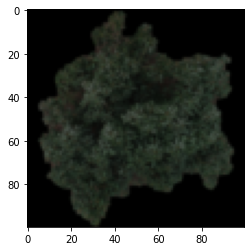

In [10]:
i=img['PhantomRGB']
ir=np.dstack([i[0,:,:],i[1,:,:],i[2,:,:]])
plt.imshow(ir)

In [11]:
print(model.encoder_conv.im_layers)
model.to('cpu')
fl=model.encoder_conv(torch.unsqueeze(img['PhantomRGB'], 0))
#fl_=model.flatten(fl)
#fl_u=model.encoder_NN_mu(fl_)
#fl_sig=model.encoder_NN_sig(fl_)

ModuleList(
  (0): set_conv(
    (comp_layer): ModuleList(
      (0): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
      (1): Tanh()
      (2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): set_conv(
    (comp_layer): ModuleList(
      (0): Conv2d(6, 12, kernel_size=(7, 7), stride=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): set_conv(
    (comp_layer): ModuleList(
      (0): Conv2d(12, 24, kernel_size=(7, 7), stride=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
)


0


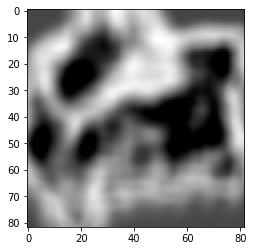

1


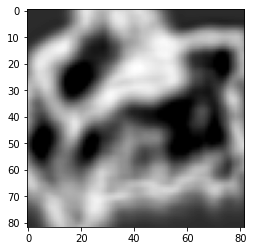

2


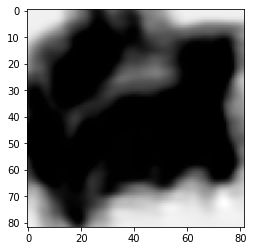

3


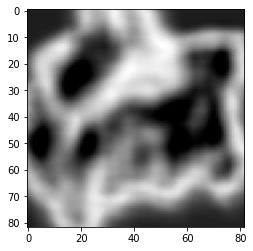

4


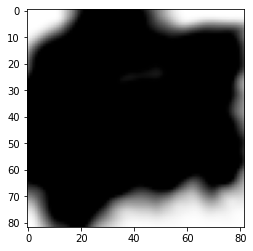

5


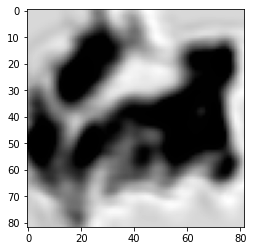

6


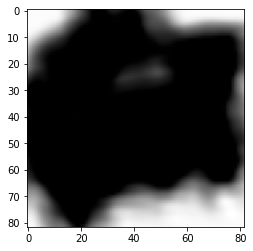

7


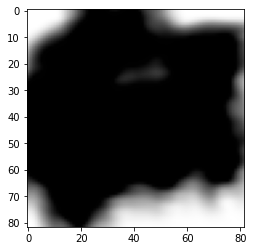

8


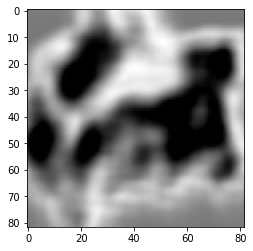

9


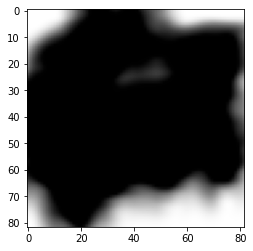

10


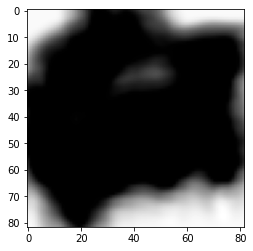

11


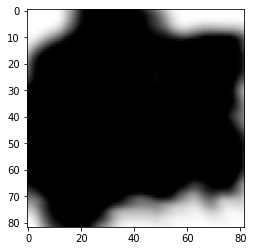

12


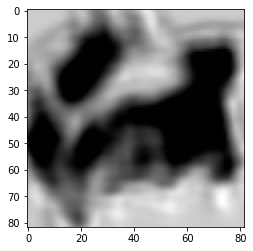

13


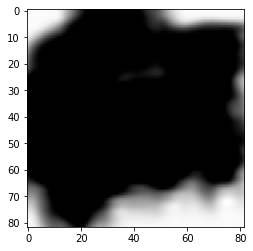

14


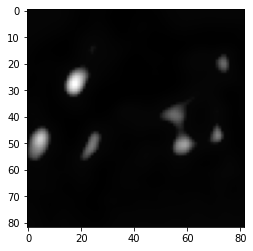

15


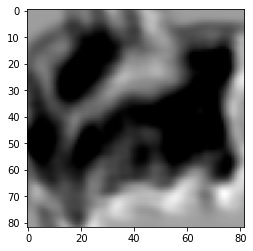

16


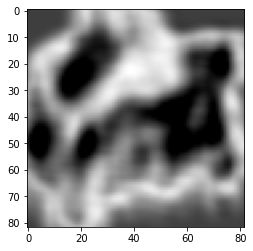

17


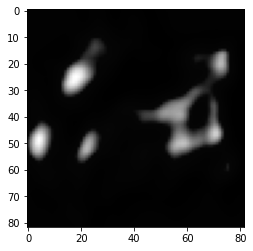

18


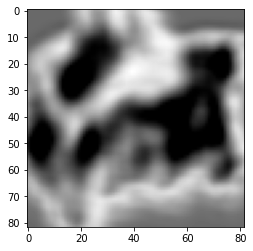

19


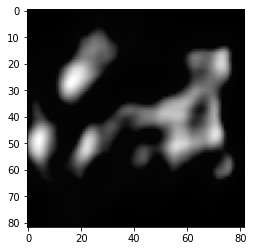

20


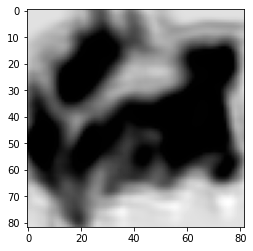

21


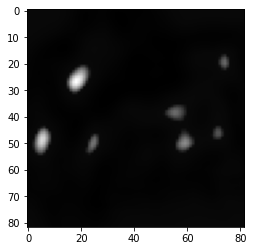

22


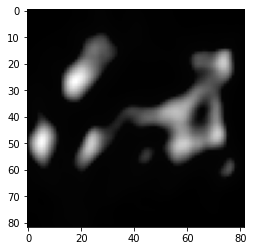

23


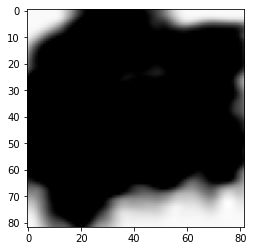

In [12]:
for i in range(24):
    print(i)
    plt.imshow(fl[0,i,:,:].detach().numpy(),cmap='gray')
    plt.show()
#plt.imshow(fl[0,0,:,:].detach().numpy())
#fl[0,0,:,:].detach().numpy().shape

In [13]:
model.to('cuda')
iod=model.forward_recc_d(torch.unsqueeze(img['PhantomRGB'], 0).to('cuda'))
iou=model.forward_recc_u(torch.unsqueeze(img['PhantomRGB'], 0).to('cuda'))

In [19]:
iou=iou[0].to('cpu').detach().numpy()
iod=iod[0].to('cpu').detach().numpy()

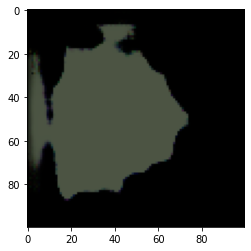

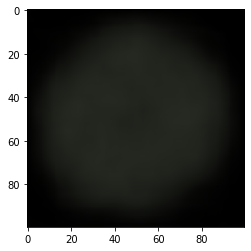

In [20]:
#io=io[0,:,:,:]
ir=np.dstack([iou[0,:,:],iou[1,:,:],iou[2,:,:]])
plt.imshow(ir)
plt.show()
ir=np.dstack([iod[0,:,:],iod[1,:,:],iod[2,:,:]])
plt.imshow(ir)
plt.show()

In [18]:
io.shape

(3, 100, 100)

In [36]:
model.to('cpu')
fl=model.encoder_conv(torch.unsqueeze(img['PhantomRGB'], 0))
fl_=model.flatten(fl)
fl_u=model.encoder_NN_mu(fl_)
fl_sig=model.encoder_NN_sig(fl_)

array([[0.1086854, 0.1086854, 0.1086854, ..., 0.1086854, 0.1086854,
        0.1086854],
       [0.1086854, 0.1086854, 0.1086854, ..., 0.1086854, 0.1086854,
        0.1086854],
       [0.1086854, 0.1086854, 0.1086854, ..., 0.1086854, 0.1086854,
        0.1086854],
       ...,
       [0.1086854, 0.1086854, 0.1086854, ..., 0.1086854, 0.1086854,
        0.1086854],
       [0.1086854, 0.1086854, 0.1086854, ..., 0.1086854, 0.1086854,
        0.1086854],
       [0.1086854, 0.1086854, 0.1086854, ..., 0.1086854, 0.1086854,
        0.1086854]], dtype=float32)

In [2]:
meta_dir="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=aorus_1,volume=Paltas_DataBase/metadata_VAE_v2"

In [3]:
metad=np.array(os.listdir(meta_dir)[1:])

In [4]:
metad_dict=np.vectorize(lambda meta: pickle.load(open(os.path.join(meta_dir,meta),'rb')))(metad)

In [5]:
meta_u=np.vectorize(lambda dic:dic['u'],signature='()->(j)')(metad_dict)
meta_sig=np.vectorize(lambda dic:dic['sig'],signature='()->(j)')(metad_dict)
meta_C=np.vectorize(lambda dic:dic['Class'][0],otypes=[object],signature='()->()')(metad_dict)

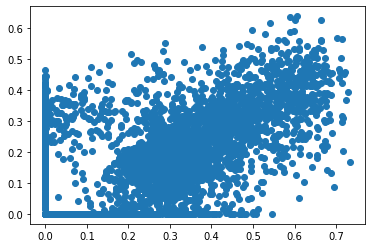

In [6]:
plt.scatter(meta_sig[:,3],meta_sig[:,11])

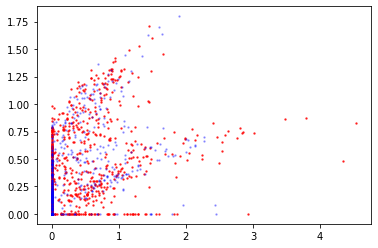

In [7]:
plt.scatter(meta_u[meta_C=='Control',11],meta_u[meta_C=='Control',-1],color='r',alpha=0.7,s=2)
plt.scatter(meta_u[meta_C=='H50%',11],meta_u[meta_C=='H50%',-1],color='b',alpha=0.3,s=2)

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
pca = PCA(n_components=2)
pca.fit(meta_u)
meta_u_p=pca.transform(meta_u)

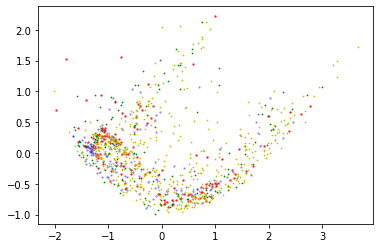

In [31]:
plt.scatter(meta_u_p[meta_C=='N_Deficiencia',0],meta_u_p[meta_C=='N_Deficiencia',1],color='b',alpha=0.3,s=2)
plt.scatter(meta_u_p[meta_C=='N_Control',0],meta_u_p[meta_C=='N_Control',1],color='r',alpha=0.7,s=2)
plt.scatter(meta_u_p[meta_C=='N_Exceso',0],meta_u_p[meta_C=='N_Exceso',1],color='g',alpha=1.,s=0.5)
plt.scatter(meta_u_p[meta_C=='H50%',0],meta_u_p[meta_C=='H50%',1],color='y',alpha=1.,s=0.5)

In [19]:
pca = PCA(n_components=2)
pca.fit(meta_sig)
meta_sig_p=pca.transform(meta_sig)

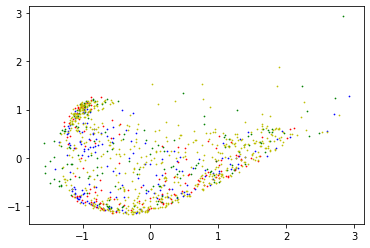

In [27]:
plt.scatter(meta_sig_p[meta_C=='N_Deficiencia',0],meta_sig_p[meta_C=='N_Deficiencia',1],color='b',alpha=1.,s=0.5)
plt.scatter(meta_sig_p[meta_C=='N_Control',0],meta_sig_p[meta_C=='N_Control',1],color='r',alpha=1.,s=0.5)
plt.scatter(meta_sig_p[meta_C=='N_Exceso',0],meta_sig_p[meta_C=='N_Exceso',1],color='g',alpha=1.,s=0.5)
plt.scatter(meta_sig_p[meta_C=='H50%',0],meta_sig_p[meta_C=='H50%',1],color='y',alpha=1.,s=0.5)

In [36]:
pca = TSNE(n_components=2)
meta_sig_p=pca.fit_transform(meta_sig)

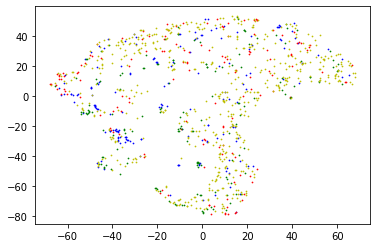

In [38]:
plt.scatter(meta_sig_p[meta_C=='N_Deficiencia',0],meta_sig_p[meta_C=='N_Deficiencia',1],color='b',alpha=1.,s=0.5)
plt.scatter(meta_sig_p[meta_C=='N_Control',0],meta_sig_p[meta_C=='N_Control',1],color='r',alpha=1.,s=0.5)
plt.scatter(meta_sig_p[meta_C=='N_Exceso',0],meta_sig_p[meta_C=='N_Exceso',1],color='g',alpha=1.,s=0.5)
plt.scatter(meta_sig_p[meta_C=='H50%',0],meta_sig_p[meta_C=='H50%',1],color='y',alpha=1.,s=0.5)

In [39]:
pca = TSNE(n_components=2)
meta_u_p=pca.fit_transform(meta_u)

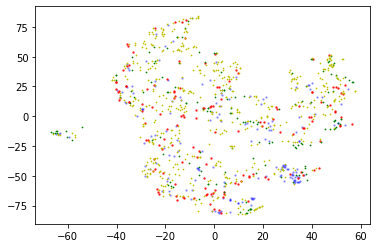

In [40]:
plt.scatter(meta_u_p[meta_C=='N_Deficiencia',0],meta_u_p[meta_C=='N_Deficiencia',1],color='b',alpha=0.3,s=2)
plt.scatter(meta_u_p[meta_C=='N_Control',0],meta_u_p[meta_C=='N_Control',1],color='r',alpha=0.7,s=2)
plt.scatter(meta_u_p[meta_C=='N_Exceso',0],meta_u_p[meta_C=='N_Exceso',1],color='g',alpha=1.,s=0.5)
plt.scatter(meta_u_p[meta_C=='H50%',0],meta_u_p[meta_C=='H50%',1],color='y',alpha=1.,s=0.5)

In [44]:
pca = TSNE(n_components=2)
meta_a_p=pca.fit_transform(np.hstack((meta_u,meta_sig)))

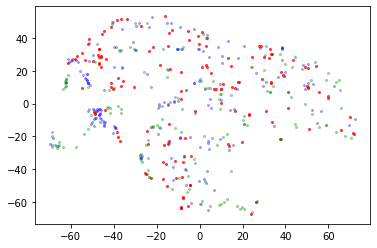

In [50]:
plt.scatter(meta_a_p[meta_C=='N_Deficiencia',0],meta_a_p[meta_C=='N_Deficiencia',1],color='b',alpha=0.3,s=4.2)
plt.scatter(meta_a_p[meta_C=='N_Control',0],meta_a_p[meta_C=='N_Control',1],color='r',alpha=0.7,s=4.2)
plt.scatter(meta_a_p[meta_C=='N_Exceso',0],meta_a_p[meta_C=='N_Exceso',1],color='g',alpha=.3,s=4.5)
#plt.scatter(meta_a_p[meta_C=='H50%',0],meta_a_p[meta_C=='H50%',1],color='y',alpha=1.,s=0.5)
#plt.scatter(meta_a_p[meta_C=='Control',0],meta_a_p[meta_C=='Control',1],color='k',alpha=1.,s=0.5)